<a href="https://colab.research.google.com/github/cclljj/Google_colab_ipynb/blob/master/Example_speech_recognition_analysis_(public).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Olivia Tanuwidjaja (2022/2/12), Speech Recognition for Analytics (https://towardsdatascience.com/speech-recognition-for-analytics-e98c1e496873)
*   https://github.com/oliviatan29/speech-recognition-analysis/blob/main/Speech%20Recognition.ipynb

* How to iterate over an audio file in 20s intervals? (https://stackoverflow.com/questions/53540087/how-to-iterate-over-an-audio-file-in-20s-intervals)

* Python | Speech recognition on large audio files (https://www.geeksforgeeks.org/python-speech-recognition-on-large-audio-files/)


In [1]:
# Import generic libraries
!pip install pydub      # splitting audio files and stuff
!pip install SpeechRecognition
!pip install opencc-python-reimplemented
!pip install pytube

import pandas as pd
import numpy as np
import sys
from google.colab import output
import matplotlib.pyplot as plt
from pydub.silence import split_on_silence


def aptget(cmd):
  tag='apt-get-{}'.format(cmd.replace(' ','-'))
  with output.use_tags(tag):
    print('Executing {} \n'.format(cmd))
    !apt-get $cmd
    sys.stdout.flush()
        
  output.clear(output_tags=tag)
  print('Executing {} ... Done. (output hidden for tidyness)'.format(cmd))

aptget('update')
aptget('upgrade')
aptget('install ffmpeg')
aptget('install ffprobe')

Executing update ... Done. (output hidden for tidyness)
Executing upgrade ... Done. (output hidden for tidyness)
Executing install ffmpeg ... Done. (output hidden for tidyness)
Executing install ffprobe ... Done. (output hidden for tidyness)


In [3]:
# Import AudioSegment and play
from pydub import AudioSegment

AudioSegment.converter = "ffmpeg"
AudioSegment.ffmpeg = "ffmpeg"
AudioSegment.ffprobe ="ffprobe"

from pydub.playback import play

# Example 1: Speech recognition using YouTube video

In [4]:
import speech_recognition as sr
from pytube import YouTube
from opencc import OpenCC

youtube_URL = "https://www.youtube.com/watch?v=f7T9dVKzQ5c"
youtube_fname = 'tmp_youtube.mp4'
youtube_wav_fname = 'tmp_youtube.wav'

yt = YouTube(youtube_URL)
yt.streams.filter(only_audio=True)

# choose the audio stream itag
stream = yt.streams.get_by_itag(139)

stream.download(filename=youtube_fname)

'/content/tmp_youtube.mp4'

In [5]:
raw_file = AudioSegment.from_file(file=youtube_fname, format="mp4")

raw_file.export(out_f=youtube_wav_fname , format="wav")
wav_file = AudioSegment.from_file(file=youtube_wav_fname, format="wav")
wav_file_length = wav_file.duration_seconds

cc = OpenCC('s2twp')

# Set up recognizer
r = sr.Recognizer()
r.energy_threshold = 300

number_of_iterations = int(wav_file_length/20)
if number_of_iterations == 0:
  number_of_iterations = 1

test_audio = sr.AudioFile(youtube_wav_fname)
for i in range(number_of_iterations):
  with test_audio as source:
    audio = r.record(source, offset = i*20, duration = 20)

    google = r.recognize_google(audio, language = 'zh-TW' )
    print(cc.convert(google))

從微信的空氣品質感測一直到智慧城市治理
我們如何知道空氣品質好不好我們早期的話我們可能就是會到環保署的這個官方資料有一個空氣品質監測網那我們全臺灣大概目前有將近80箇中標準測站這個張立80個標準測算呢它可以同時兩側幾種不同的汙染物那1我們現在所在地
華山園區來說的話還不可以直接拿離我最近的車站來代表我這個地方的空氣品質嗎顯然不行嗎更不用說我們旁邊有這個高架橋高架橋下可能這個交通流量很大帶來的這個交通染有很多所以這個你變得非常棘手到底現在這個地方空氣品質好不好
你們能不能夠去組裝一個微信的趕車去然後可以讓我帶著到處兩側設有就自己偷偷做看看但是這一座很就花了三年時間從無到有開始去收集市面上感測器開始去組裝開始去做量測試面上了非常非常多的氛圍顯感測器不是說任何一個這種微型的簡單的感受
原價買回來裝下就能動他就叫做是一個微型的空氣品質感測器絕對不是而是說這個空氣品質的感測器它必須要能夠跟標準的儀器它至少要有一定的趨勢的相關這個東西才是可用的感測器但是唯心感測器它雖然好像不是用的標準這個詞不是目的
高亮不知道準確可是為什麼它能夠用因為它有個很重要關鍵是它體積非常小它價錢非常便宜所以我們可以大量的部件我們可以用以量取勝我們必須要有非常多的感測器源源不絕提供我資料讓我可以去應用只有我們所希望達到目標是每個人都有一個感測器可以隨時
帶著但是我要如何去應Power每個人開車這件事情那我就必須要把所有的技術門檻給強的將來越低越好我們所用的元件全部都是開放的元件全部都是市面上買得到的軟體我們的所有的程式碼全部都在網路上你可以自由下載全部都是open source我們所熟
大的data全部都是Open data所以我們把技術門檻降的這麼低為了就是我們希望要能夠引力越來越多更多的人可以去參與我們這個生態系我記得2015年的時候我們剛開始發起這個活動我們組織的第1次的社群聚會那次來的100多個人這個社群這麼的
有興趣參與這樣一個參與式感受生態系與是乎開始遊廠商也進來廠商進來之後呢是地方政府也進來了那我可不可以利用這樣的一個感測器去表達我對於我曾是一頭居民的關心接著教育圈也拉了進來老師們發現說這個趕車去第1個
從無到有組裝過程原來可以這麼的簡單說他很適合拿來做創客教育其他老謝發所以這樣一個感受的工具這麼的便宜可以吸毒所以我可以帶著這個趕車去跟學生去做些環境教育接著中央政府也跳進來了中央政府在前瞻

# Example 2: Speech recognition using online MP3 file

演講稿：109年 總統國慶演說：符合對等尊嚴 願促成兩岸有意義對話【全文】 
https://www.cna.com.tw/news/firstnews/202010105005.aspx

In [6]:
import speech_recognition as sr
from opencc import OpenCC

In [7]:
!wget https://www.dropbox.com/s/18d9f8ao8yiwgr6/President_Tsai_Speech.mp3

mp3_fname = "President_Tsai_Speech.mp3"
wav_fname = "temp.wav"

# Create an AudioSegment instance
raw_file = AudioSegment.from_file(file=mp3_fname, format="mp3")

# Export the .mp3 file as wav
raw_file.export(out_f=wav_fname, format="wav")
wav_file = AudioSegment.from_file(file=wav_fname, format="wav")

--2022-02-16 08:36:46--  https://www.dropbox.com/s/18d9f8ao8yiwgr6/President_Tsai_Speech.mp3
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/18d9f8ao8yiwgr6/President_Tsai_Speech.mp3 [following]
--2022-02-16 08:36:46--  https://www.dropbox.com/s/raw/18d9f8ao8yiwgr6/President_Tsai_Speech.mp3
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb1b582bf306c41aeaaed094fca.dl.dropboxusercontent.com/cd/0/inline/Bf3mjX254A5JKLKPP6KihRgrh0HUzrDvhSmU5L6FfqytJyFuaWbWoeNu1UB_8tEYhy-Ewr_zldikf-qXoWrfSoKAcWAbLoVJ4GFJUt3AyIm3mdu960OIc_rKpv52-GK9rq52TT3e1bWuCjFnXZDXW4Br/file# [following]
--2022-02-16 08:36:46--  https://ucb1b582bf306c41aeaaed094fca.dl.dropboxusercontent.com/cd/0/inline/Bf3mjX254A5JKLKPP6KihRgrh0HUzrDvhSmU5L6FfqytJyFuaWb

In [17]:
wav_file_length = wav_file.duration_seconds
print("The speech file is " + str(wav_file_length) + " seconds long.")
number_of_iterations = int(wav_file_length/20)
if number_of_iterations == 0:
  number_of_iterations = 1

# Set up recognizer
r = sr.Recognizer()
r.energy_threshold = 300

cc = OpenCC('s2twp')
test_audio = sr.AudioFile("temp.wav")


for i in range(number_of_iterations):
  with test_audio as source:
    audio = r.record(source, offset = i*20, duration = 20)
    try:
      speech_text = r.recognize_google(audio, language = 'zh-TW' )
      print(cc.convert(speech_text))
    except:
      speech_text = ""
      pass

The speech file is 1397.2375625 seconds long.
大會主席遊戲坤院長現場各位貴賓電視機前還有網路上的全體國人同胞大家早安大家好
今天是中華民國109年的國慶日今年因為一起盡顯的規模縮小了但是所有的
無論身在何處都發自內心清和中華民國臺灣渡過了重重挑戰的一年2020年在新型冠狀病毒威脅下溫室
臺灣或者是全世界都是驚濤駭浪的一年但是也因為這場全球性的危機才讓國際社會看到臺灣漸認識到的特質還能來我們沒有風塵
沒有關閉學校也是世界上少數還能夠在管制措施下開打之棒舉辦大型一文活動的國家我們更展現的後人的玻璃將防疫物資送到
世界各地從今年3月以來有超過3300篇國際媒體報道都在談論臺灣的防疫表現臺灣在國際上的面貌越來越清晰
比過去任何時期都更加的兩眼這樣的成就要歸功於全體臺灣人民的團結合作除了最辛苦的醫護板檢疫人員我們要感謝
製造業吸收投入防疫物資生產科技業開發App要是朋友超商的員工協助傳送口罩還有我們所有的民眾井然有序的配合各項的防疫措施
我們也看到海外歸來的國人比規定居家隔離檢疫與行業者提供防疫旅館專車業者提供網易車隊餐廳娛樂場所落實實名制規定因為
全國上下一心我們守住的疫情的防線讓臺灣成為世界的模範生當日本的申請人手牽手相傑克的韋德棋差一著美國的阿扎爾部長坦克拉科夫斯基
相繼來訪表達他們對臺灣的敬意的時候相資訊許多多的國人都感到無比的真分數和語言的挑戰我們證明了國家在逆境中的生存能力建立了國米
自信更重要的是我們團結了因為我們深刻的體會到守護家園的重要所以這一年確實是一個辛苦而險峻的一年但也是豐收的一年今天的大會中邀請到
行各業的防疫英雄來過我們領唱國歌其中有很多我們熟悉的故事項是哪一年護理師臉上光榮的口罩牙和或者是張玩兒護理師
家人出任務陪伴血友病少年返臺的感人的事蹟還有更多的無名的英雄不曾被報道因為這一場戰役有太多人的投入有說不完的故事啊請現場的好
用最熱烈的掌聲再一次給我們的防疫英雄們滿滿的感謝謝謝他們為臺灣合作的最初因為
疫情控制得到臺灣成為全球少數可以維持經濟正成長的國家我們也會一行後的經濟發展超前部署六大核心戰略產業正在積極規劃推動前瞻基礎建
計劃也已經分析編列特別帥賈素進行當中最讓我們感到振奮的事是國人及其對臺灣經濟發展的信心更強的臺灣資本長期以來外流的趨勢已經反轉
我們迎來幾10年來最大規模的資金迴流潮牌商返臺投

# General Audio Features Explorations

In [8]:
import librosa
import librosa.display

## Amplitude

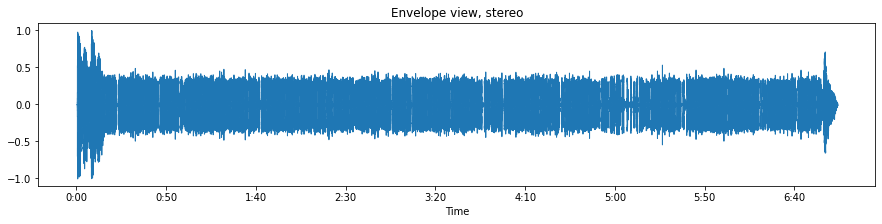

In [9]:
y, r = librosa.load(youtube_wav_fname, mono=False)

fig, ax = plt.subplots(figsize=(15, 3))
img = librosa.display.waveshow(y, sr=r, ax=ax)

ax.set(title='Envelope view, stereo')
ax.label_outer()

plt.show()

## Frequency

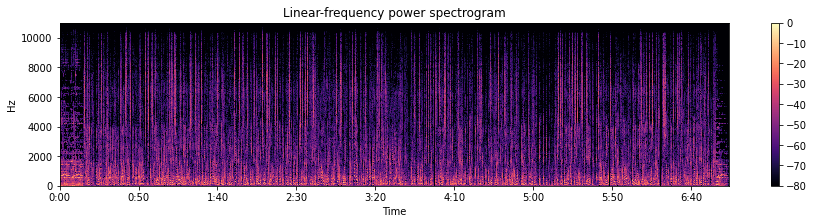

In [10]:
# Load audio file to Librosa
y, r = librosa.load(youtube_wav_fname)

# Converts data into short term Fourier transform. 
# STFT converts signals such that we can know the amplitude of the given frequency at a given time
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# Display spectogram
fig, ax = plt.subplots(figsize=(15, 3))
img = librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=r)
ax.set(title='Linear-frequency power spectrogram')
ax.label_outer()

plt.colorbar()

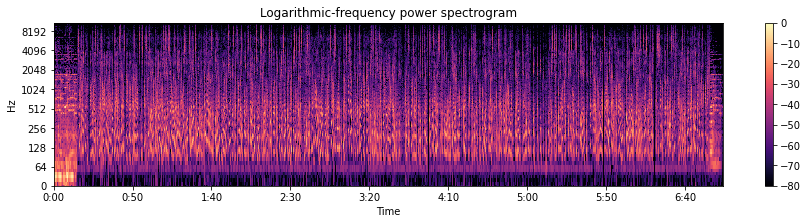

In [11]:
fig, ax = plt.subplots(figsize=(15, 3))
img = librosa.display.specshow(D, y_axis='log', x_axis='time', sr=r)
ax.set(title='Logarithmic-frequency power spectrogram')
ax.label_outer()

plt.colorbar()